In [153]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
import seaborn as sns

from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, KFold, cross_val_score

pd.options.mode.chained_assignment = None  # default='warn'

limited_dataset = False

In [154]:
at_car_ads = pd.read_csv('adverts.csv')

In [155]:
at_car_ads.shape

(402005, 12)

In [156]:
at_car_ads.describe(include='all')

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
count,4.020050e+05,401878.000000,370148,396627,402005,402005,402005,368694.000000,4.020050e+05,401168,402005,401404
unique,NaN,NaN,72,22,110,1168,2,NaN,NaN,16,2,9
top,NaN,NaN,17,Black,BMW,Golf,USED,NaN,NaN,Hatchback,False,Petrol
freq,NaN,NaN,36738,86287,37376,11583,370756,NaN,NaN,167315,400210,216929
mean,2.020071e+14,37743.595656,NaN,NaN,NaN,NaN,NaN,2015.006206,1.734197e+04,NaN,NaN,NaN
std,1.691662e+10,34831.724018,NaN,NaN,NaN,NaN,NaN,7.962667,4.643746e+04,NaN,NaN,NaN
min,2.013072e+14,0.000000,NaN,NaN,NaN,NaN,NaN,999.000000,1.200000e+02,NaN,NaN,NaN
25%,2.020090e+14,10481.000000,NaN,NaN,NaN,NaN,NaN,2013.000000,7.495000e+03,NaN,NaN,NaN
50%,2.020093e+14,28629.500000,NaN,NaN,NaN,NaN,NaN,2016.000000,1.260000e+04,NaN,NaN,NaN
75%,2.020102e+14,56875.750000,NaN,NaN,NaN,NaN,NaN,2018.000000,2.000000e+04,NaN,NaN,NaN


In [157]:
# pyplot.boxplot(at_car_ads["year_of_registration"])
# pyplot.show()
at_car_ads.boxplot(column='price')

<AxesSubplot:>

In [158]:
at_car_ads = at_car_ads[(at_car_ads['price'] <= at_car_ads['price'].quantile(0.90))] # 0.999
at_car_ads['price'].describe()

count    361993.000000
mean      12647.251071
std        7328.761663
min         120.000000
25%        6995.000000
50%       11500.000000
75%       17470.000000
max       31990.000000
Name: price, dtype: float64

In [159]:
at_car_ads = at_car_ads[(at_car_ads['price'] >= 500)] # 500

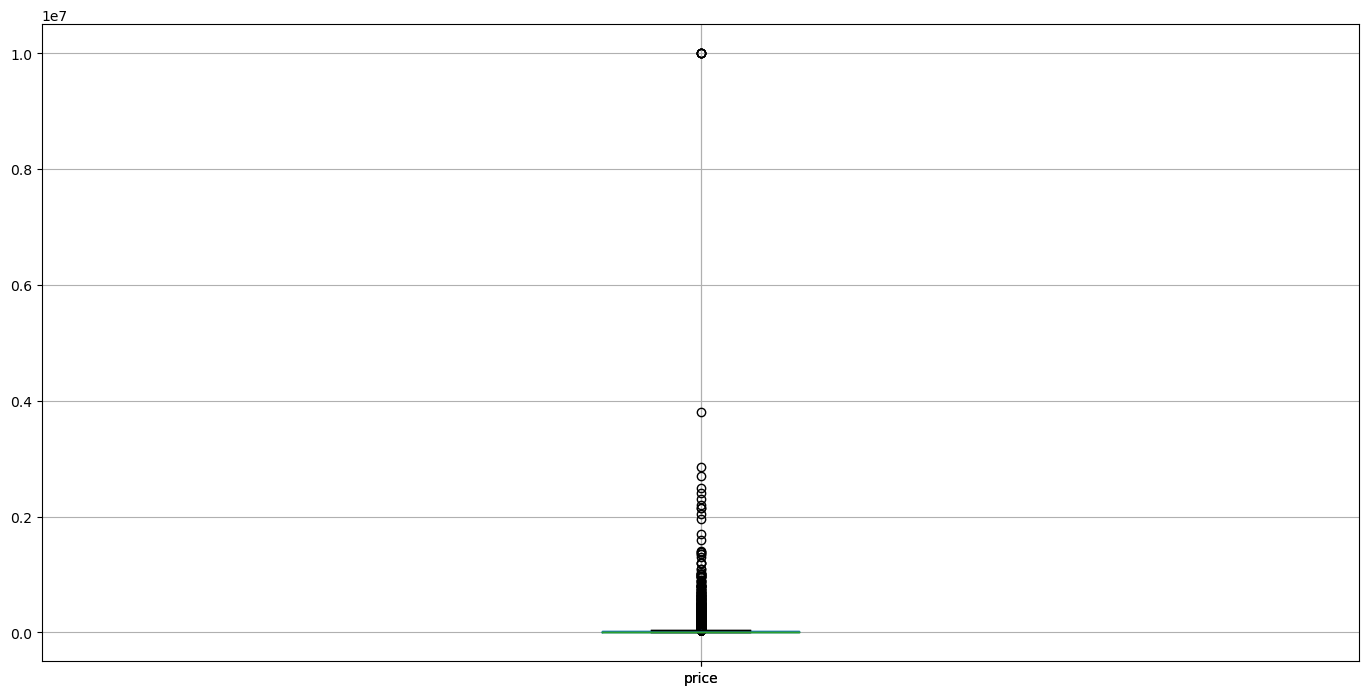

In [160]:
at_car_ads.boxplot(column='price')
pyplot.show()

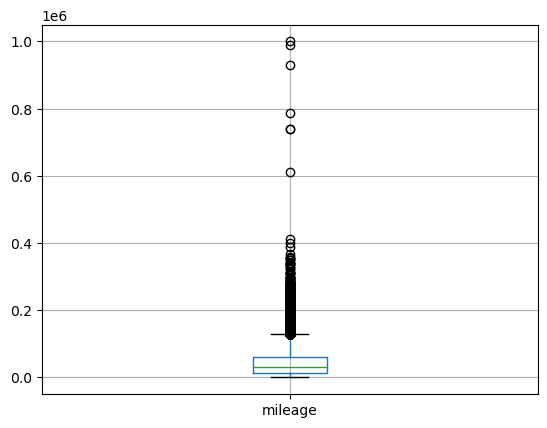

In [161]:
at_car_ads.boxplot(column='mileage')
pyplot.show()

In [162]:
at_car_ads = at_car_ads[(at_car_ads['mileage'] <= at_car_ads['mileage'].quantile(0.95))] # 0.99
at_car_ads['mileage'].describe()

count    343833.000000
mean      35948.645921
std       28247.917069
min           0.000000
25%       12973.000000
50%       29950.000000
75%       55000.000000
max      108000.000000
Name: mileage, dtype: float64

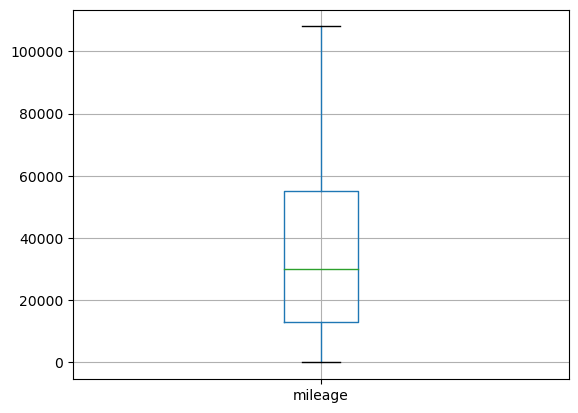

In [163]:
at_car_ads.boxplot(column='mileage')
pyplot.show()

In [164]:
if limited_dataset:
    year_index = at_car_ads[(at_car_ads['year_of_registration'] <= 2010)].index
else: 
    year_index = at_car_ads[(at_car_ads['year_of_registration'] <= 1950)].index # 1950
    
at_car_ads.drop(index=year_index, inplace=True)
at_car_ads.describe(include='all')

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
count,3.438130e+05,343813.000000,323964,339930,343813,343813,343813,322785.000000,343813.000000,343173,343813,343466
unique,NaN,NaN,70,22,92,959,2,NaN,NaN,16,2,8
top,NaN,NaN,17,Black,Vauxhall,Golf,USED,NaN,NaN,Hatchback,False,Petrol
freq,NaN,NaN,35024,71161,32289,10626,324348,NaN,NaN,159468,342728,194121
mean,2.020075e+14,35948.115196,NaN,NaN,NaN,NaN,NaN,2015.229912,13070.454102,NaN,NaN,NaN
std,1.483505e+10,28247.774714,NaN,NaN,NaN,NaN,NaN,3.908891,7223.206271,NaN,NaN,NaN
min,2.013072e+14,0.000000,NaN,NaN,NaN,NaN,NaN,1952.000000,500.000000,NaN,NaN,NaN
25%,2.020090e+14,12972.000000,NaN,NaN,NaN,NaN,NaN,2014.000000,7495.000000,NaN,NaN,NaN
50%,2.020093e+14,29950.000000,NaN,NaN,NaN,NaN,NaN,2016.000000,11995.000000,NaN,NaN,NaN
75%,2.020102e+14,55000.000000,NaN,NaN,NaN,NaN,NaN,2018.000000,17790.000000,NaN,NaN,NaN


In [165]:
at_car_ads.head(10)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
2,202007020778474,7800.0,17,Grey,SKODA,Yeti,USED,2017.0,14000,SUV,False,Petrol
3,202007080986776,45000.0,16,Brown,Vauxhall,Mokka,USED,2016.0,7995,Hatchback,False,Diesel
4,202007161321269,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,2015.0,26995,SUV,False,Diesel
5,202009304412074,16000.0,17,Blue,Audi,S5,USED,2017.0,29000,Convertible,False,Petrol
6,202007080998445,24075.0,17,Red,Vauxhall,Viva,USED,2017.0,5861,Hatchback,False,Petrol
7,202009244143980,99000.0,13,Bronze,Land Rover,Range Rover,USED,2013.0,24475,SUV,False,Diesel
10,202007151278313,77000.0,60,Grey,Volkswagen,Passat,USED,2010.0,4499,Saloon,False,Diesel
11,202007161303602,24487.0,17,Black,Peugeot,208,USED,2017.0,8795,Hatchback,False,Petrol
12,202009173867934,4765.0,69,White,SKODA,Octavia,USED,2019.0,16990,Estate,False,Petrol
13,202009234108830,18214.0,19,Silver,SEAT,Leon,USED,2019.0,14290,Hatchback,False,Petrol


In [166]:
at_car_ads.isna().sum()

public_reference             0
mileage                      0
reg_code                 19849
standard_colour           3883
standard_make                0
standard_model               0
vehicle_condition            0
year_of_registration     21028
price                        0
body_type                  640
crossover_car_and_van        0
fuel_type                  347
dtype: int64

# Cleaning and pre-processing data

### Handling General Missing values
* reg_code is only null for mostly new cars. This can be replaced with 23, assuming those cars will be registered in 2023
* mileage,body_type & fuel_type can be predicted using KNNImputer
* Features like standard_color can be impute with most common colour
* year_of_registration can be ignored because that column will be dropped.

### Other pre-processings
* year_of_registration and reg_code can be compared to see if any missing values can be retrived.
* null values of reg_code and vehicle_condition can be compared to see if new cars does not have a reg_code

* year_of_registration can be droped, because reg_code also provides the same information. Instead of just the registration year reg_code provides a small indication of which part of the year car is registered. Therefore dropping the year_of_registration column.

In [167]:
# Impute standard_color with most common colour
colour_imputer = SimpleImputer(strategy='most_frequent', missing_values=np.nan)
colour_imputer = colour_imputer.fit(at_car_ads[['standard_colour']])
at_car_ads['standard_colour'] = colour_imputer.transform(at_car_ads[['standard_colour']])

In [168]:
year_nans = at_car_ads[(at_car_ads['year_of_registration'].notnull()) & (at_car_ads['reg_code'].isnull()) & (at_car_ads['vehicle_condition'] != "NEW")]
year_nans.size

2004

 * Amount of data that can be recovered from above method is comparitively less. Therefore ignoring it.

In [169]:
at_car_ads = at_car_ads.drop(columns=['year_of_registration', 'public_reference'])

In [170]:
if limited_dataset:
    at_car_ads = at_car_ads[(at_car_ads.groupby("standard_colour")["standard_colour"].transform('size') > 10000) & (at_car_ads.groupby("standard_model")["standard_model"].transform('size') > 5000) & (at_car_ads.groupby("body_type")["body_type"].transform('size') > 1000)& (at_car_ads.groupby("standard_model")["standard_model"].transform('size') > 5000)]
    print(at_car_ads.shape)

In [171]:
new_cars = at_car_ads[at_car_ads["vehicle_condition"] == "NEW"]
if limited_dataset:
    at_car_ads_capped = at_car_ads[(at_car_ads.groupby("reg_code")["reg_code"].transform('size') > 8000) & (at_car_ads["vehicle_condition"] != "NEW")]
else:
    at_car_ads_capped = at_car_ads[(at_car_ads.groupby("reg_code")["reg_code"].transform('size') > 100) & (at_car_ads["vehicle_condition"] != "NEW")]
at_car_ads.shape, at_car_ads_capped.shape, new_cars.shape

((343813, 10), (323215, 10), (19465, 10))

In [172]:
# New cars reg_code is set to 23
reg_code_imputer = SimpleImputer(strategy='constant', missing_values=np.nan, fill_value=23)
reg_code_imputer = reg_code_imputer.fit(new_cars[['reg_code']])
new_cars['reg_code'] = reg_code_imputer.transform(new_cars[['reg_code']])
new_cars.shape

(19465, 10)

In [173]:
# joining new and old cars dfs
at_car_ads_capped = pd.concat([at_car_ads_capped, new_cars])
at_car_ads_capped.shape

(342680, 10)

In [174]:
at_car_ads_capped.isna().sum()

mileage                    0
reg_code                   0
standard_colour            0
standard_make              0
standard_model             0
vehicle_condition          0
price                      0
body_type                560
crossover_car_and_van      0
fuel_type                331
dtype: int64

# Handling Categorical Values
Identifying categorical values

  COLUMN NAME                      | POSSIBLE VALUE COUNT
* reg_code                         | 100
* standard_colour                  | 22
* standard_make                    | 103
* standard_model                   | 1091
* vehicle_condition (boolean)      | 2(only 1 available)
* body_type                        | 16
* crossover_car_and_van (boolean)  | 2
* fuel_type                        | 9

There are different types of categories are available in this dataset
### Less categories
These can be handled with a technique like One-Hot-Encoding
Ex - vehicle_condition
### More categories
OHE cannot be used in these type of categorical values. OHE introduce a lot of features to the model which makes the model inefficient.
Ex - reg_code, standard_make, standard_model

In [176]:
print('reg_code ' + str(at_car_ads_capped['reg_code'].unique()) + '\n')
print('standard_colour ' + str(at_car_ads_capped['standard_colour'].unique())+ '\n')
print('standard_make ' + str(at_car_ads_capped['standard_make'].unique())+ '\n')
print('standard_model ' + str(at_car_ads_capped['standard_model'].unique())+ '\n')
print('vehicle_condition ' + str(at_car_ads_capped['vehicle_condition'].unique())+ '\n')
print('body_type ' + str(at_car_ads_capped['body_type'].unique())+ '\n')
print('crossover_car_and_van ' + str(at_car_ads_capped['crossover_car_and_van'].unique())+ '\n')
print('fuel_type ' + str(at_car_ads_capped['fuel_type'].unique())+ '\n')

reg_code ['17' '16' '64' '13' '60' '69' '19' '66' '12' '18' '65' '09' '61' '10'
 '14' '03' '67' '63' '15' '68' '56' '20' '70' '11' '05' '59' '58' '62'
 '08' '02' 'W' '57' '06' '52' '55' '51' '07' '04' 'X' 'Y' '53' '54' 'T'
 'P' 'R' 23]

standard_colour ['Grey' 'Brown' 'Blue' 'Red' 'Bronze' 'Black' 'White' 'Silver' 'Purple'
 'Green' 'Orange' 'Yellow' 'Turquoise' 'Gold' 'Beige' 'Multicolour' 'Pink'
 'Maroon' 'Burgundy' 'Magenta' 'Navy' 'Indigo']

standard_make ['SKODA' 'Vauxhall' 'Land Rover' 'Audi' 'Volkswagen' 'Peugeot' 'SEAT'
 'MINI' 'BMW' 'Mercedes-Benz' 'Nissan' 'Mitsubishi' 'Citroen' 'Toyota'
 'Kia' 'Volvo' 'Renault' 'Honda' 'Jaguar' 'DS AUTOMOBILES' 'Hyundai'
 'Fiat' 'Smart' 'Porsche' 'Abarth' 'Mazda' 'Suzuki' 'MG' 'Dacia' 'Subaru'
 'SsangYong' 'Alfa Romeo' 'Lexus' 'Maserati' 'Jeep' 'Bentley' 'Chevrolet'
 'Aston Martin' 'Daihatsu' 'Isuzu' 'Saab' 'Rover' 'Cadillac' 'Lotus'
 'Infiniti' 'Dodge' 'Chrysler' 'TVR' 'CUPRA' 'Perodua' 'Great Wall'
 'Proton' 'Tesla' 'Westfield' 'Tiger' 'Hum

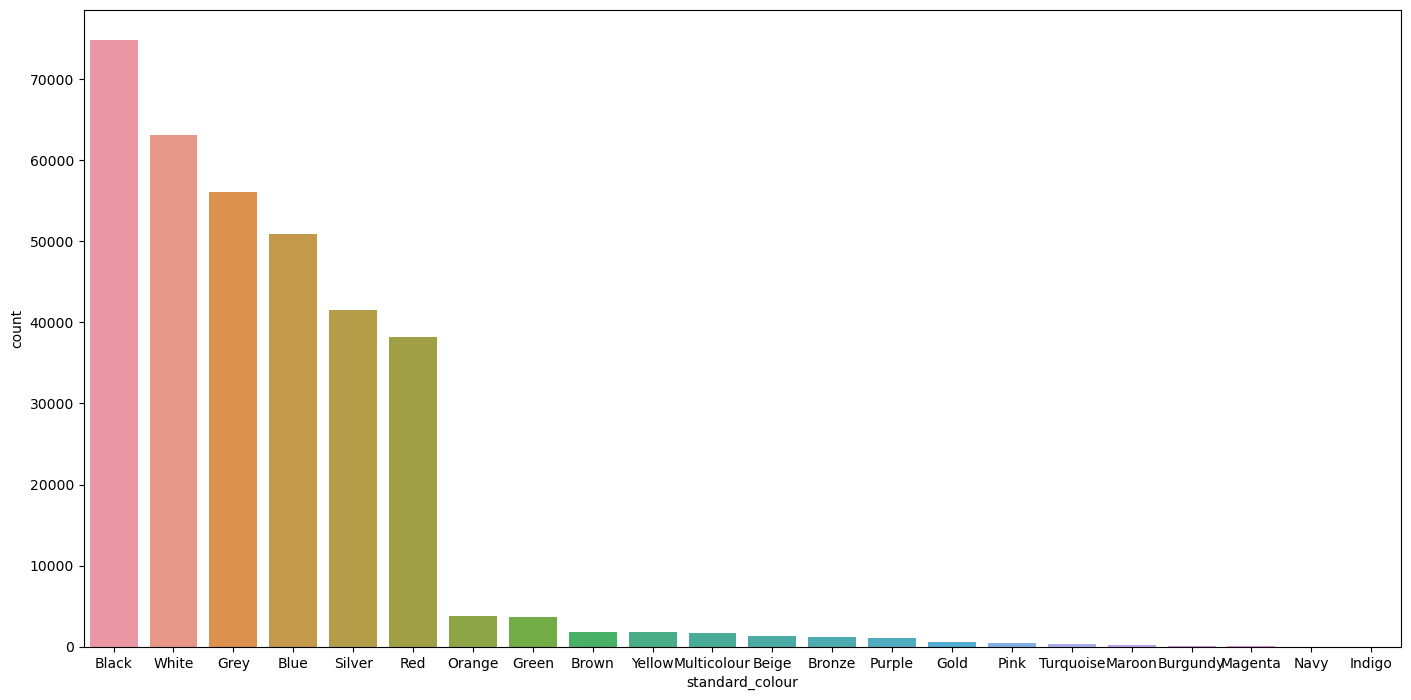

In [177]:
a4_dims = (17, 8.27)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax, x=at_car_ads_capped["standard_colour"], order = at_car_ads_capped["standard_colour"].value_counts().index)
pyplot.show()

In [25]:
at_car_ads_capped = at_car_ads_capped.reset_index(drop=True)

In [26]:
ohe = OneHotEncoder(categories='auto',handle_unknown='error', sparse=False)
ohe_cat_cols = ['vehicle_condition', 'crossover_car_and_van']
# transformer = make_column_transformer((ohe, ohe_cat_cols))
transformed = ohe.fit_transform(at_car_ads_capped[ohe_cat_cols])
if limited_dataset:
    at_car_ads_ohe = pd.DataFrame(transformed, columns=['veh_cond_new','veh_cond_used','cross_car_van_false'])
else:
    at_car_ads_ohe = pd.DataFrame(transformed, columns=['veh_cond_new','veh_cond_used','cross_car_van_false','cross_car_van'])
at_car_ads_ohe = at_car_ads_ohe.drop(columns=['veh_cond_used','cross_car_van_false'])
at_car_ads_ohe

,veh_cond_new,cross_car_van
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
342675,1.0,0.0
342676,1.0,0.0
342677,1.0,0.0
342678,1.0,0.0


In [27]:
at_car_ads_capped = at_car_ads_capped.join(at_car_ads_ohe)
at_car_ads_capped

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,crossover_car_and_van,fuel_type,veh_cond_new,cross_car_van
0,7800.0,17,Grey,SKODA,Yeti,USED,14000,SUV,False,Petrol,0.0,0.0
1,45000.0,16,Brown,Vauxhall,Mokka,USED,7995,Hatchback,False,Diesel,0.0,0.0
2,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,26995,SUV,False,Diesel,0.0,0.0
3,16000.0,17,Blue,Audi,S5,USED,29000,Convertible,False,Petrol,0.0,0.0
4,24075.0,17,Red,Vauxhall,Viva,USED,5861,Hatchback,False,Petrol,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
342675,10.0,23,Black,Fiat,500,NEW,12500,Hatchback,False,Petrol,1.0,0.0
342676,5.0,23,Black,SEAT,Ibiza,NEW,17700,Hatchback,False,Petrol,1.0,0.0
342677,4.0,23,Red,Peugeot,508,NEW,22990,Hatchback,False,Diesel,1.0,0.0
342678,5.0,23,Black,Nissan,Qashqai,NEW,24340,SUV,False,Petrol,1.0,0.0


In [28]:

df_size = 1

# get frequency encoding for reg_code
reg_code_dic = at_car_ads_capped['reg_code'].value_counts()/df_size
at_car_ads_capped['reg_code_fq_encode'] = at_car_ads_capped['reg_code'].map(reg_code_dic)

# get frequency encoding for standard_colour
std_clr_dic = at_car_ads_capped['standard_colour'].value_counts()/df_size
at_car_ads_capped['std_clr_fq_encode'] = at_car_ads_capped['standard_colour'].map(std_clr_dic)

# get frequency encoding for standard_make
std_mk_dic = at_car_ads_capped['standard_make'].value_counts()/df_size
at_car_ads_capped['std_mk_fq_encode'] = at_car_ads_capped['standard_make'].map(std_mk_dic)

# get frequency encoding for standard_model
std_mdl_dic = at_car_ads_capped['standard_model'].value_counts()/df_size
at_car_ads_capped['std_mdl_fq_encode'] = at_car_ads_capped['standard_model'].map(std_mdl_dic)

# get frequency encoding for body_type
body_typ_dic = at_car_ads_capped['body_type'].value_counts()/df_size
at_car_ads_capped['body_typ_fq_encode'] = at_car_ads_capped['body_type'].map(body_typ_dic)

# get frequency encoding for fuel_type
fuel_typ_dic = at_car_ads_capped['fuel_type'].value_counts()/df_size
at_car_ads_capped['fuel_typ_fq_encode'] = at_car_ads_capped['fuel_type'].map(fuel_typ_dic)

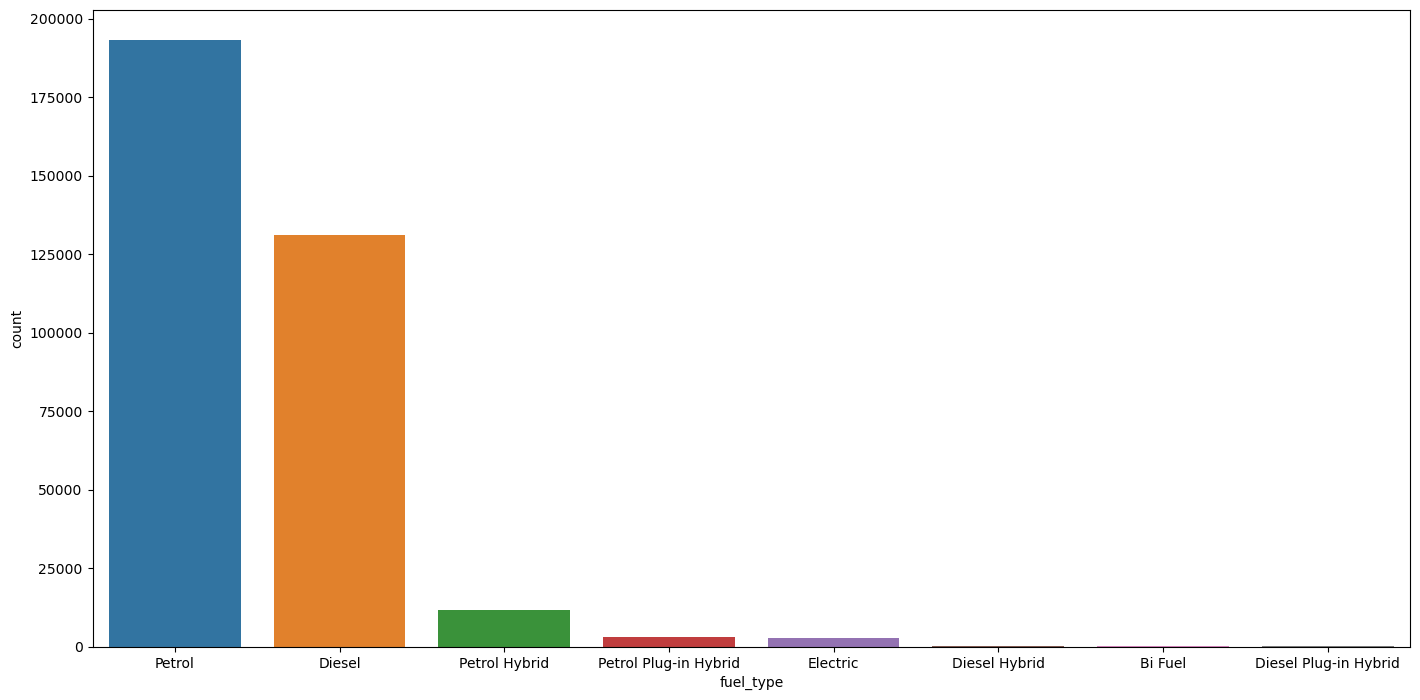

In [29]:
a4_dims = (17, 8.27)
fig,ax = pyplot.subplots(figsize=a4_dims)
sns.countplot(ax = ax, x=at_car_ads_capped["fuel_type"], order = at_car_ads_capped["fuel_type"].value_counts().index)
pyplot.show()

# Handling Categorical values



In [30]:
at_car_ads_capped

,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,price,body_type,crossover_car_and_van,fuel_type,veh_cond_new,cross_car_van,reg_code_fq_encode,std_clr_fq_encode,std_mk_fq_encode,std_mdl_fq_encode,body_typ_fq_encode,fuel_typ_fq_encode
0,7800.0,17,Grey,SKODA,Yeti,USED,14000,SUV,False,Petrol,0.0,0.0,35024.0,56151.0,11545.0,801.0,91079.0,193157.0
1,45000.0,16,Brown,Vauxhall,Mokka,USED,7995,Hatchback,False,Diesel,0.0,0.0,18719.0,1856.0,32249.0,1303.0,159268.0,130965.0
2,64000.0,64,Grey,Land Rover,Range Rover Sport,USED,26995,SUV,False,Diesel,0.0,0.0,11997.0,56151.0,6791.0,895.0,91079.0,130965.0
3,16000.0,17,Blue,Audi,S5,USED,29000,Convertible,False,Petrol,0.0,0.0,35024.0,50919.0,28269.0,345.0,11791.0,193157.0
4,24075.0,17,Red,Vauxhall,Viva,USED,5861,Hatchback,False,Petrol,0.0,0.0,35024.0,38252.0,32249.0,484.0,159268.0,193157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
342675,10.0,23,Black,Fiat,500,NEW,12500,Hatchback,False,Petrol,1.0,0.0,19465.0,74845.0,9979.0,5852.0,159268.0,193157.0
342676,5.0,23,Black,SEAT,Ibiza,NEW,17700,Hatchback,False,Petrol,1.0,0.0,19465.0,74845.0,9267.0,2721.0,159268.0,193157.0
342677,4.0,23,Red,Peugeot,508,NEW,22990,Hatchback,False,Diesel,1.0,0.0,19465.0,38252.0,14401.0,264.0,159268.0,130965.0
342678,5.0,23,Black,Nissan,Qashqai,NEW,24340,SUV,False,Petrol,1.0,0.0,19465.0,74845.0,19034.0,7280.0,91079.0,193157.0


In [31]:
if not limited_dataset:
    at_car_ads_capped = at_car_ads_capped[['mileage','price','reg_code_fq_encode','std_clr_fq_encode','std_mk_fq_encode','std_mdl_fq_encode','body_typ_fq_encode','fuel_typ_fq_encode','veh_cond_new','cross_car_van']]
else:
    at_car_ads_capped = at_car_ads_capped[['mileage','price','reg_code_fq_encode','std_clr_fq_encode','std_mk_fq_encode','std_mdl_fq_encode','body_typ_fq_encode','fuel_typ_fq_encode','veh_cond_new']]
    
at_car_ads_capped.isna().sum()

mileage                 0
price                   0
reg_code_fq_encode      0
std_clr_fq_encode       0
std_mk_fq_encode        0
std_mdl_fq_encode       0
body_typ_fq_encode    560
fuel_typ_fq_encode    331
veh_cond_new            0
cross_car_van           0
dtype: int64

## Scaling Data

In [32]:
X_scaled = at_car_ads_capped.drop(columns='price')
y = at_car_ads_capped['price']
std_scaler = StandardScaler()
at_car_ads_scaled = std_scaler.fit_transform(X_scaled)
at_car_ads_scaled = pd.DataFrame(at_car_ads_scaled, columns=std_scaler.get_feature_names_out())
at_car_ads_scaled.isna().sum()

mileage                 0
reg_code_fq_encode      0
std_clr_fq_encode       0
std_mk_fq_encode        0
std_mdl_fq_encode       0
body_typ_fq_encode    560
fuel_typ_fq_encode    331
veh_cond_new            0
cross_car_van           0
dtype: int64

## Imputing null values with KNNImputer

In [33]:
knn_imputer = KNNImputer(n_neighbors=5)
at_car_ads_scaled_nun_null = pd.DataFrame(knn_imputer.fit_transform(at_car_ads_scaled), columns=at_car_ads_scaled.columns)
at_car_ads_scaled_nun_null.isna().sum()

mileage               0
reg_code_fq_encode    0
std_clr_fq_encode     0
std_mk_fq_encode      0
std_mdl_fq_encode     0
body_typ_fq_encode    0
fuel_typ_fq_encode    0
veh_cond_new          0
cross_car_van         0
dtype: int64

In [34]:
X = at_car_ads_scaled_nun_null

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
X_train.shape, y_train.shape

((257010, 9), (257010,))

In [36]:
from sklearn.ensemble import RandomForestRegressor


In [37]:
rfr = RandomForestRegressor(max_depth=8, min_samples_split=26, min_samples_leaf=11, n_estimators=440, max_features='auto', bootstrap=True) #max_depth=8, min_samples_split=15, min_samples_leaf=8, n_estimators=400
rfr.fit(X_train, y_train)


RandomForestRegressor(max_depth=8, min_samples_leaf=11, min_samples_split=26,
                      n_estimators=440)

In [39]:
rfr.score(X_train, y_train), rfr.score(X_test, y_test)

(0.7623456194574223, 0.7588279665172312)

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(leaf_size=21, p=1, n_neighbors=11, weights='uniform',algorithm='auto') # after hyperparameter tuning
knn.fit(X_train, y_train)

KNeighborsRegressor(leaf_size=21, n_neighbors=11, p=1)

In [41]:
knn.score(X_train, y_train), knn.score(X_test, y_test)

(0.8777690621547958, 0.8522995752192127)

In [138]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(max_depth=19, min_samples_split=11)
dtr.fit(X_train, y_train)

dtr.score(X_train, y_train), dtr.score(X_test, y_test)

(0.9500532025676623, 0.9100078150141991)

In [43]:
from sklearn import linear_model

lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

lr.score(X_train, y_train), lr.score(X_test, y_test)

(0.49484085666940036, 0.4978466339591451)

# Model Evaluation

## Mean Squared Error / Mean Absolut Error

In [47]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [48]:
actual_val = y_test
rf_predicted_val = rfr.predict(X_test)
kn_predicted_val = knn.predict(X_test)
tr_predicted_val = dtr.predict(X_test)

### KNN

In [49]:
mse_knn = mean_squared_error(actual_val, kn_predicted_val, squared=False)
mae_knn = mean_absolute_error(y_test, kn_predicted_val)

mse_knn, mae_knn

(2770.9571577799584, 1842.3633583412036)

### Random Forest

In [50]:
mse_rf = mean_squared_error(actual_val, rf_predicted_val, squared=False)
mae_rf = mean_absolute_error(y_test, rf_predicted_val)

mse_rf, mae_rf

(3540.80827531046, 2573.720268948319)

### Decision Tree

In [141]:
mse_dt = mean_squared_error(actual_val, tr_predicted_val, squared=False)
mae_dt = mean_absolute_error(y_test, tr_predicted_val)

mse_dt, mae_dt

(2162.924386409164, 1460.3908135347208)

## Error vs Price

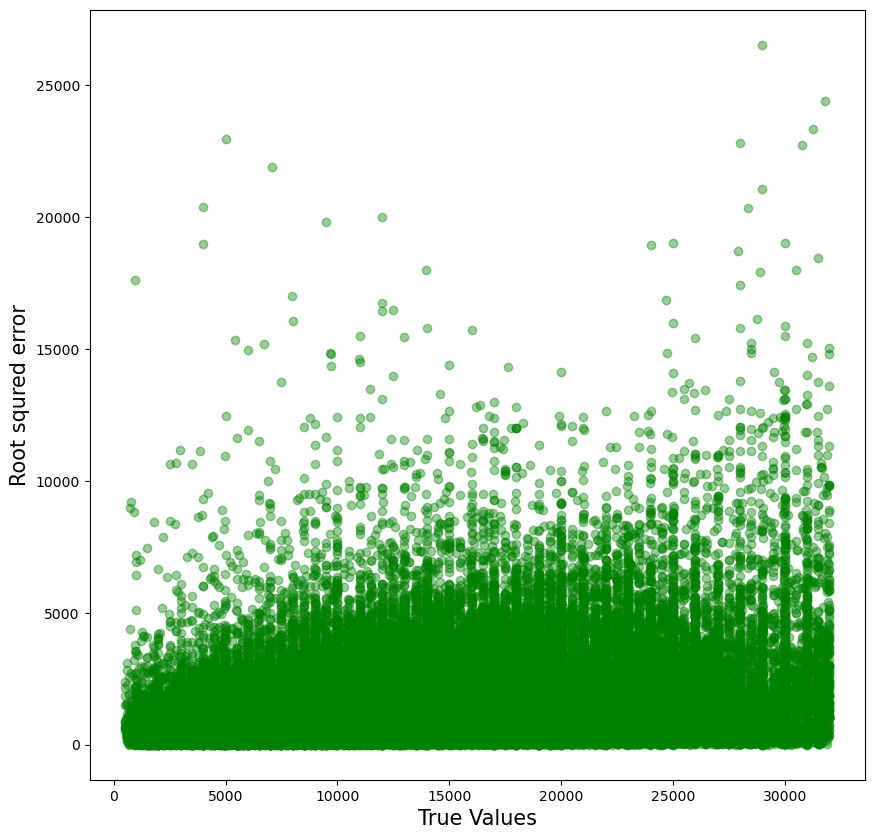

In [146]:
knn_diff = actual_val - kn_predicted_val
rf_diff = actual_val - rf_predicted_val
dt_diff = actual_val - tr_predicted_val

rf_diff = (rf_diff**2)**0.5
# knn_diff = (knn_diff**2)**0.5
dt_diff = (dt_diff**2)**0.5

pyplot.figure(figsize=(10,10))
# pyplot.scatter(actual_val, rf_diff, c='crimson', alpha=0.2)
# pyplot.scatter(actual_val, knn_diff, c='blue', alpha=0.2)
pyplot.scatter(actual_val, dt_diff, c='green', alpha=0.4)

pyplot.xlabel('True Values', fontsize=15)
pyplot.ylabel('Root squred error', fontsize=15)

pyplot.show()

## Scatter plot for predicted values vs actual values

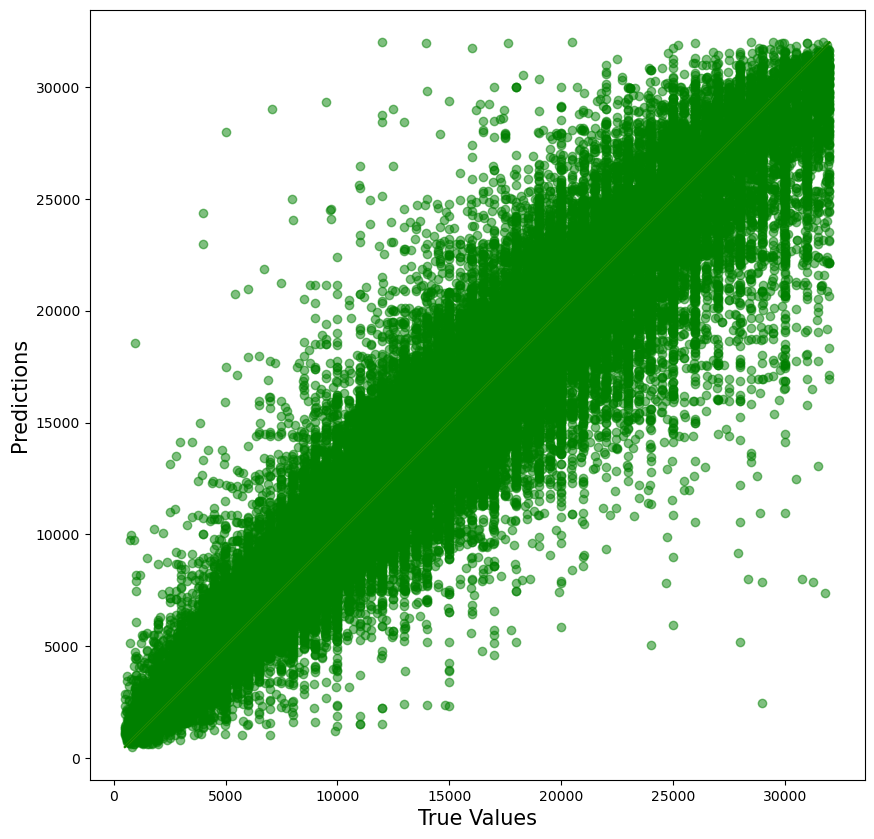

In [139]:


# lr_predicted_val = lr.predict(X_test)

pyplot.figure(figsize=(10,10))
# pyplot.scatter(actual_val, rf_predicted_val, c='crimson', alpha=0.4)
# pyplot.scatter(actual_val, kn_predicted_val, c='blue', alpha=0.4)
pyplot.scatter(actual_val, tr_predicted_val, c='green', alpha=0.5)
# pyplot.scatter(actual_val, lr_predicted_val, c='purple', alpha=0.5)

# pyplot.yscale('log')
# pyplot.xscale('log')


p1 = max(max(rf_predicted_val), max(actual_val))
p2 = min(min(rf_predicted_val), min(actual_val))
pp1 = max(max(kn_predicted_val), max(actual_val))
pp2 = min(min(kn_predicted_val), min(actual_val))
pyplot.plot([p1, p2], [p1, p2], 'y-')
pyplot.plot([pp1, pp2], [pp1, pp2], 'g-')
pyplot.xlabel('True Values', fontsize=15)
pyplot.ylabel('Predictions', fontsize=15)
pyplot.axis('equal')
pyplot.show()

# Cross Validate


In [145]:
k_splits = 10
k_folds = KFold(n_splits = k_splits)
rcv_scores = cross_val_score(rfr, X, y, cv = k_folds)


k_folds = KFold(n_splits = k_splits)
kcv_scores = cross_val_score(knn, X, y, cv = k_folds)


k_folds = KFold(n_splits = k_splits)
dcv_scores = cross_val_score(dtr, X, y, cv = k_folds)

# Random forest           KNN           Decision tree
rcv_scores.mean(), kcv_scores.mean(), dcv_scores.mean()

(0.6919889288623976, 0.8262616261295908, 0.8493927032343404)

# Feature importance

In [133]:
rfr.feature_importances_

array([0.08160796, 0.14443762, 0.00384915, 0.08778437, 0.41561258,
       0.07821238, 0.01650091, 0.17199503])

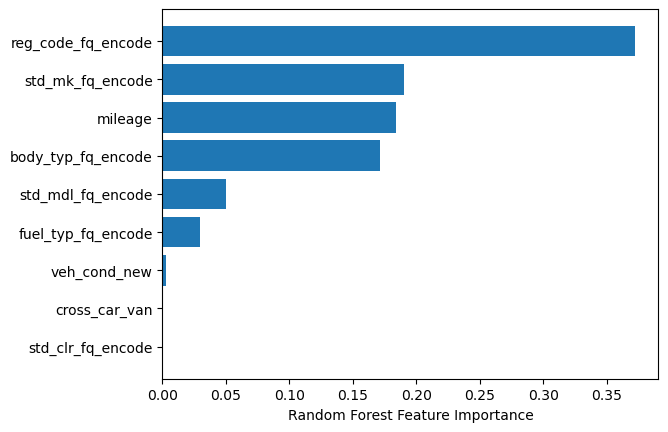

In [182]:
sorted_idx = rfr.feature_importances_.argsort()
pyplot.barh(X.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
pyplot.xlabel("Random Forest Feature Importance")
pyplot.show()

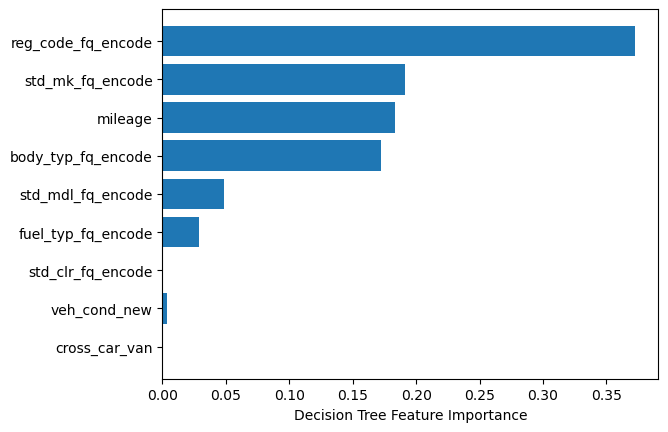

In [150]:
sorted_idx = dtr.feature_importances_.argsort()
pyplot.barh(X.columns[sorted_idx], rfr.feature_importances_[sorted_idx])
pyplot.xlabel("Decision Tree Feature Importance")
pyplot.show()

## Feature importance with SHAP

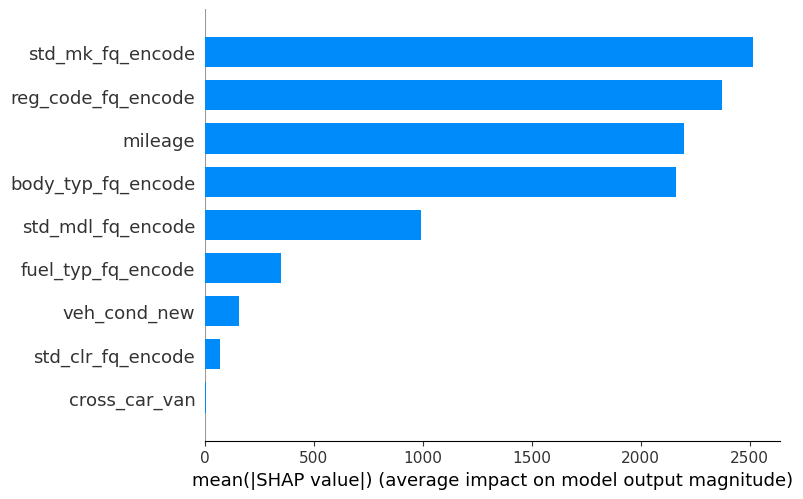

In [148]:
import shap

explainer_dtr = shap.TreeExplainer(dtr)
shap_values_dtr = explainer_dtr.shap_values(X_test)

shap.summary_plot(shap_values_dtr, X_test, plot_type="bar")

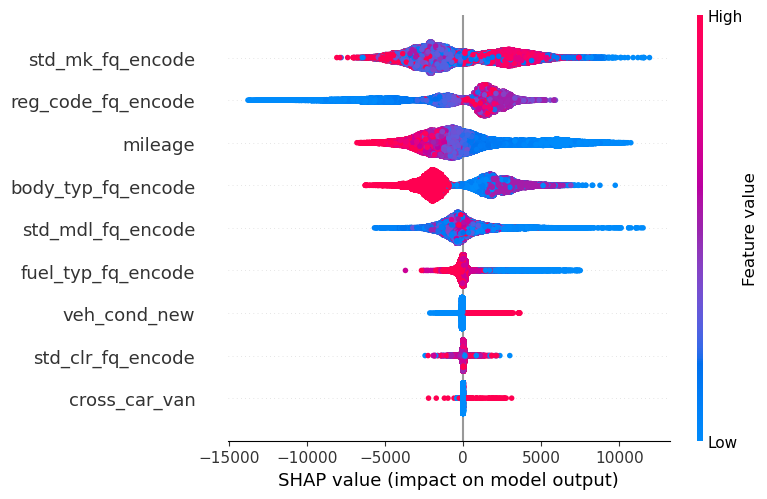

In [151]:
shap.summary_plot(shap_values_dtr, X_test)

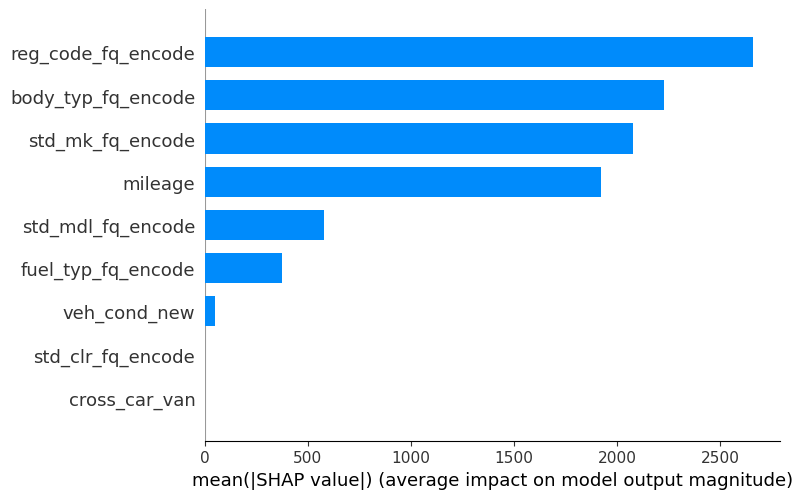

In [191]:
explainer_rfr = shap.TreeExplainer(rfr)
shap_values_rfr = explainer_rfr.shap_values(X_test)

shap.summary_plot(shap_values_rfr, X_test, plot_type="bar")

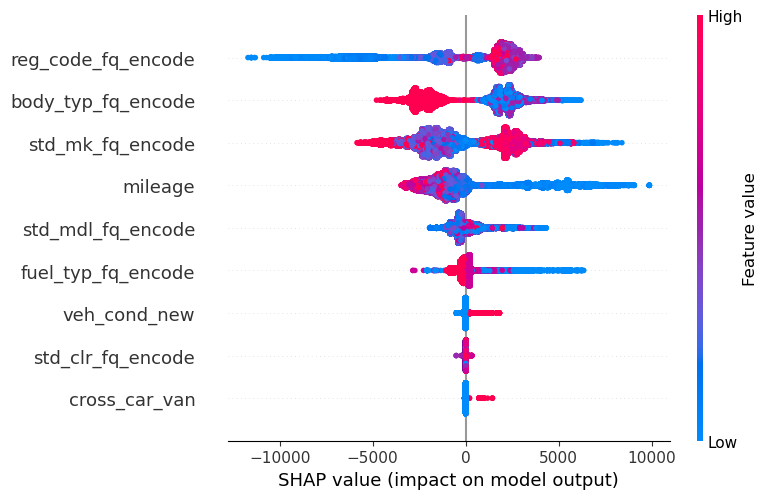

In [192]:
shap.summary_plot(shap_values, X_test)

# Hyper parameter tuning 

In [75]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

### KNN

In [262]:
leaf_size = list(range(1,100,10))
n_neighbors = list(range(1,100,10))
weights = ['uniform', 'distance']
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
p=[1,2]

knn_hyperparameters = dict(leaf_size=leaf_size, n_neighbors=n_neighbors, p=p, weights=weights, algorithm=algorithm)

In [263]:
knn_2 = KNeighborsRegressor()

In [268]:

kn_rscv = RandomizedSearchCV(knn_2, knn_hyperparameters, cv=10)
kn_gscv = GridSearchCV(knn_2, knn_hyperparameters, cv=10)

In [269]:
#Fit the model
# knn_best_model = kn_rscv.fit(X_train,y_train)
knn_best_model = kn_gscv.fit(X_train,y_train)

In [273]:
#Print The value of best Hyperparameters
knn_best_model.best_params_

{'algorithm': 'auto',
 'leaf_size': 21,
 'n_neighbors': 11,
 'p': 1,
 'weights': 'uniform'}

In [274]:
knn_best_model.score(X_train, y_train), knn_best_model.score(X_test, y_test)

(0.8565169181816004, 0.8419863375519778)

## Decision Tree

In [134]:
max_depth = [19]
min_samples_split = [11]
min_samples_leaf = list(range(1,16,2))
min_weight_fraction_leaf = list(x * 0.01 for x in range(1,50,9))
max_leaf_nodes = list(range(2,16,2))
max_features= list(range(1,7))

dt_hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf, min_weight_fraction_leaf=min_weight_fraction_leaf, max_leaf_nodes=max_leaf_nodes, max_features=max_features)
dt_hyperparameters

{'max_depth': [19],
 'min_samples_split': [11],
 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15],
 'min_weight_fraction_leaf': [0.01, 0.1, 0.19, 0.28, 0.37, 0.46],
 'max_leaf_nodes': [2, 4, 6, 8, 10, 12, 14],
 'max_features': [1, 2, 3, 4, 5, 6]}

In [135]:
dt_2 = DecisionTreeRegressor()
dt_rscv = RandomizedSearchCV(dt_2, dt_hyperparameters, cv=10)
dt_best_model = dt_rscv.fit(X_train,y_train)

In [136]:
dt_best_model.best_params_

{'min_weight_fraction_leaf': 0.1,
 'min_samples_split': 11,
 'min_samples_leaf': 11,
 'max_leaf_nodes': 8,
 'max_features': 5,
 'max_depth': 19}

In [137]:
dt_best_model.score(X_train, y_train), dt_best_model.score(X_test, y_test)

(0.42939356688536434, 0.4325502903655386)

In [108]:
{'min_weight_fraction_leaf': 0.01,
 'min_samples_split': 14,
 'min_samples_leaf': 13,
 'max_leaf_nodes': 12,
 'max_features': 3,
 'max_depth': 15}

(0.5234510162314749, 0.5214411013281999)

{'min_samples_split': 8, 'max_depth': 15}

(0.9157661675925544, 0.8939811210747171)

{'min_samples_split': 10, 'max_depth': 19}

(0.9509990059398663, 0.9095337978375277)

{'min_samples_split': 10, 'max_depth': 18}

(0.9445953834817832, 0.9085032895311106)

{'min_samples_split': 11, 'max_depth': 19} *
(0.9500532872922848, 0.910267270804184)

(0.5234510162314749, 0.5214411013281999)

### RandomForrest

In [275]:
# max_depth=list(range(7,10))
# min_samples_split=list(range(20,40,3))
# min_samples_leaf=list(range(5,12,2))
# # n_estimators= [100,200,300,400,450,500,550,600,650,700,750,800,900,1000]
# n_estimators = list(range(400,450,10))
# max_features = ['auto','sqrt']
# bootstrap = [True,False]

max_depth=[8]
min_samples_split=[24,26,30,33]
min_samples_leaf=[5,7,8,9,11]
# n_estimators= [100,200,300,400,450,500,550,600,650,700,750,800,900,1000]
n_estimators = [400,420,440,450]
max_features = ['auto','sqrt']
bootstrap = [True,False]

rf_hyperparameters = dict(max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,n_estimators=n_estimators,max_features=max_features,bootstrap=bootstrap)
rf_hyperparameters

{'max_depth': [8],
 'min_samples_split': [24, 26, 30, 33],
 'min_samples_leaf': [5, 7, 8, 9, 11],
 'n_estimators': [400, 420, 440, 450],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}

In [276]:
rf2 = RandomForestRegressor()

In [277]:
rf_rscv = RandomizedSearchCV(rf2, rf_hyperparameters, cv=10)

In [278]:
rf_mdl = rf_rscv.fit(X_train, y_train)

In [279]:
rf_mdl.best_params_

{'n_estimators': 400,
 'min_samples_split': 30,
 'min_samples_leaf': 8,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}

max_depth=8, min_samples_split=15, min_samples_leaf=8, n_estimators=400

{'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
 'min_samples_split': [10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58],
 'min_samples_leaf': [3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 'n_estimators': [100,200,300,400,450,500,550,600,650,700,750,800,900,1000],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]
 }
 
 {'n_estimators': 450,
 'min_samples_split': 30,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}
 
 -----------------------------------------------------------------------
 {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
 'min_samples_split': [25, 26, 27, 28, 29, 30, 31, 32, 33, 34],
 'min_samples_leaf': [3, 4, 5, 6, 7],
 'n_estimators': [400, 410, 420, 430, 440, 450, 460, 470, 480, 490],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]
 }
 
 
 {'n_estimators': 450,
 'min_samples_split': 33,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 8,
 'bootstrap': True}
 
 {'n_estimators': 400,
 'min_samples_split': 33,
 'min_samples_leaf': 5,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}
 
 
 {'n_estimators': 440,
 'min_samples_split': 30,
 'min_samples_leaf': 7,
 'max_features': 'sqrt',
 'max_depth': 9,
 'bootstrap': False}
 
 ------------------------------------------------------------------------------------
 
 {'max_depth': [3, 4, 5, 6, 7, 8, 9, 10, 11],
 'min_samples_split': [0, 3, 6, 9, 12, 15, 18, 21, 24, 27, 30, 33],
 'min_samples_leaf': [1, 3, 5, 7, 9, 11, 13, 15, 17],
 'n_estimators': [400, 405, 410, 415, 420, 425, 430, 435, 440, 445],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}
 
 {'n_estimators': 420,
 'min_samples_split': 24,
 'min_samples_leaf': 11,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}
 
 -------------------------------------------
 
 {'max_depth': [7, 8, 9],
 'min_samples_split': [20, 23, 26, 29, 32, 35, 38],
 'min_samples_leaf': [5, 7, 9, 11],
 'n_estimators': [400, 410, 420, 430, 440],
 'max_features': ['auto', 'sqrt'],
 'bootstrap': [True, False]}
 
 
 {'n_estimators': 420,
 'min_samples_split': 26,
 'min_samples_leaf': 9,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}
 
 (0.8790595364103718, 0.8773408753679751)
 
 {'n_estimators': 440,
 'min_samples_split': 26,
 'min_samples_leaf': 11,
 'max_features': 'auto',
 'max_depth': 8,
 'bootstrap': True}
 
 (0.8643166499470879, 0.8602213477343931)

In [280]:
rf_mdl.score(X_train, y_train), rf_mdl.score(X_test, y_test)

(0.8724444243473786, 0.8613665772138863)